In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# For better plots in notebook
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv("data/Bengaluru_House_Data.csv")
df.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [7]:
df = df.dropna(subset=['price']).copy()

In [8]:
# Extract BHK from 'size' column
df['bhk'] = df['size'].str.extract(r'(\d+)').astype(float)
df = df.dropna(subset=['bhk'])

In [9]:
# Clean 'total_sqft'
def convert_sqft_to_num(x):
    try:
        x = str(x).strip()
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        val = re.findall(r'\d+\.\d+|\d+', x)
        if len(val) == 1:
            return float(val[0])
        else:
            return None
    except:
        return None

In [10]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft']).copy()

In [11]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2475.0,4.0,0.0,186.000,4.0,7515.151515
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3210.0,NaN,NaN,192.000,4.0,5981.308411
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,3203.5,NaN,NaN,224.500,4.0,7007.960044
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,5611.5,4.0,0.0,477.000,4.0,8500.400962
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1073.5,2.0,0.0,54.005,2.0,5030.740568


In [12]:
len(df.location.unique())

64

In [13]:
# Clean and group 'location'
df['location'] = df['location'].str.strip()
loc_counts = df['location'].value_counts()
rare_locs = loc_counts[loc_counts <= 10].index
df['location'] = df['location'].apply(lambda x: 'other' if x in rare_locs else x)

In [14]:
df.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
30,Super built-up Area,19-Dec,other,4 BHK,LedorSa,2475.0,4.0,0.0,186.000,4.0,7515.151515
56,Built-up Area,20-Feb,other,4 Bedroom,BrereAt,3210.0,NaN,NaN,192.000,4.0,5981.308411
81,Built-up Area,18-Oct,other,4 Bedroom,Gollela,3203.5,NaN,NaN,224.500,4.0,7007.960044
122,Super built-up Area,18-Mar,other,4 BHK,SNontle,5611.5,4.0,0.0,477.000,4.0,8500.400962
137,Super built-up Area,19-Mar,other,2 BHK,Vaarech,1073.5,2.0,0.0,54.005,2.0,5030.740568
165,Super built-up Area,18-Dec,other,2 BHK,Kinuerg,1242.5,2.0,0.0,43.490,2.0,3500.201207
188,Super built-up Area,Ready To Move,other,2 BHK,MCvarar,1277.5,2.0,0.0,56.800,2.0,4446.183953
224,Super built-up Area,19-Dec,other,3 BHK,Jurdsig,1630.0,NaN,NaN,74.820,3.0,4590.184049
549,Super built-up Area,18-Sep,other,2 BHK,Shxorm,1317.5,2.0,0.0,63.770,2.0,4840.227704
661,Super built-up Area,Ready To Move,other,2 BHK,Rarthne,1132.5,2.0,0.0,48.130,2.0,4249.889625


In [15]:
df.price_per_sqft.describe()

count      193.000000
mean      5286.676281
std       1683.791309
min       2399.751707
25%       4309.012876
50%       4949.806950
75%       5720.053836
max      12494.669510
Name: price_per_sqft, dtype: float64

In [16]:
# One-hot encode 'location'
df_1 = pd.get_dummies(df, columns=['location'], drop_first=True)
df_1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft,location_Whitefield,location_other
30,Super built-up Area,19-Dec,4 BHK,LedorSa,2475.0,4.0,0.0,186.000,4.0,7515.151515,False,True
56,Built-up Area,20-Feb,4 Bedroom,BrereAt,3210.0,NaN,NaN,192.000,4.0,5981.308411,False,True
81,Built-up Area,18-Oct,4 Bedroom,Gollela,3203.5,NaN,NaN,224.500,4.0,7007.960044,False,True
122,Super built-up Area,18-Mar,4 BHK,SNontle,5611.5,4.0,0.0,477.000,4.0,8500.400962,False,True
137,Super built-up Area,19-Mar,2 BHK,Vaarech,1073.5,2.0,0.0,54.005,2.0,5030.740568,False,True


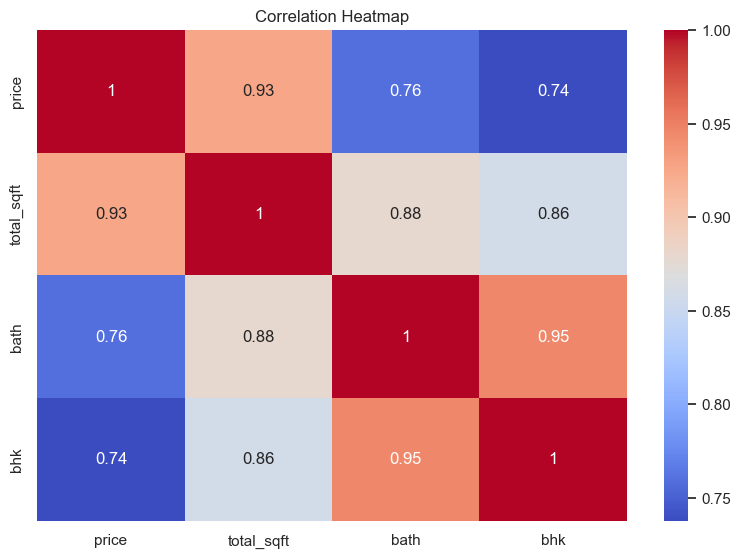

In [25]:
#Correlation Heatmap of Numerical Features
plt.figure(figsize=(8, 32))
plt.subplot(6,1,6)
numerical_cols = ['price', 'total_sqft', 'bath', 'bhk']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [17]:
# Prepare features and target
X = df_1.drop(['price', 'area_type', 'availability', 'society', 'size'], axis=1, errors='ignore')
y = df_1['price']

In [18]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

RMSE: 22.55
R2 Score: 0.92


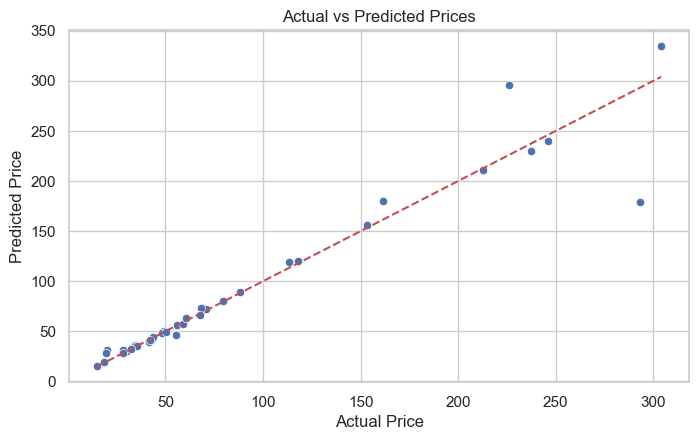

In [26]:
#Visualizations
plt.figure(figsize=(8, 32))

#Actual vs Predicted Price
plt.subplot(6,1,1)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

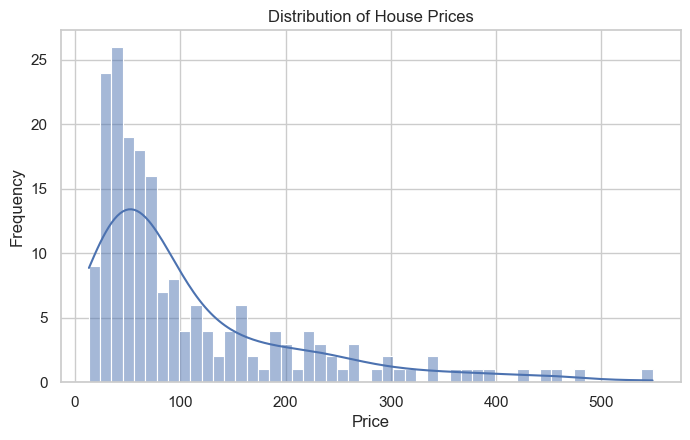

In [27]:
#Distribution of House Prices
plt.figure(figsize=(8, 32))
plt.subplot(6,1,3)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

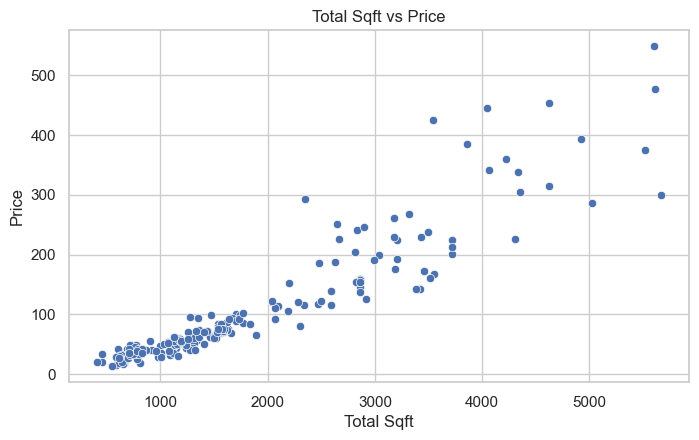

In [28]:
#Total Sqft vs Price Scatter Plot
plt.figure(figsize=(8, 32))
plt.subplot(6,1,4)
sns.scatterplot(x=df['total_sqft'], y=df['price'])
plt.title("Total Sqft vs Price")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.show()

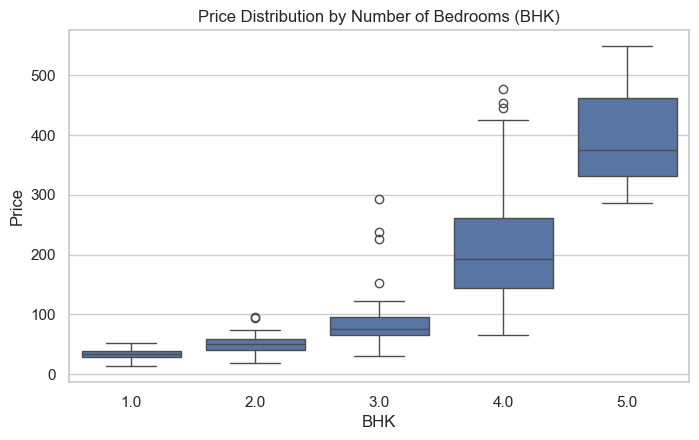

In [29]:
#BHK vs Price Boxplot
plt.figure(figsize=(8, 32))
plt.subplot(6,1,5)
sns.boxplot(x='bhk', y='price', data=df)
plt.title("Price Distribution by Number of Bedrooms (BHK)")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()